**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

**Upload and read dataset**

In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Mall_Customers.csv')
print("\nDataset head:")
print(df.head())
print("\nDataset info:")
print(df.info())

Saving Mall_Customers.csv to Mall_Customers (1).csv

Dataset head:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object

**Preprocessing (2D Clustering)**

In [4]:
# Select relevant features for clustering (Annual Income and Spending Score)
X= df.iloc[:, [3, 4]].values

# Standardize the data
scaler =StandardScaler()
X_scaled= scaler.fit_transform(X)

**Elbow method for 2D clustering**

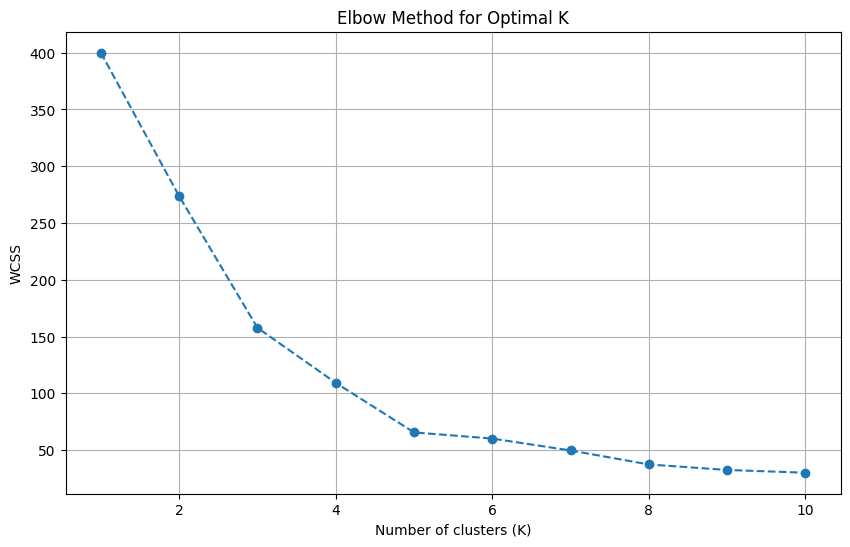

In [7]:
wcss = []
for i in range(1, 11):
    kmeans =KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

**Fit KMeans and visualize clusters (2D)**

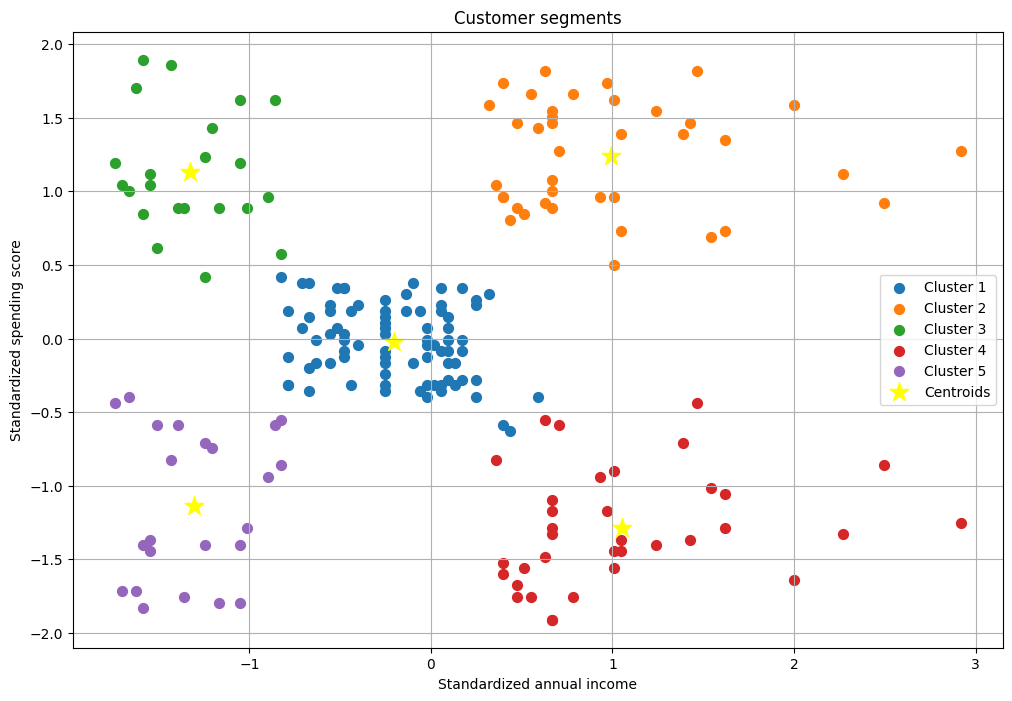

In [9]:
# Perform K-Means clustering with optimal K (let's say 5 based on the elbow)
optimal_k = 5
kmeans =KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans =kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
for i in range(optimal_k):
    plt.scatter(X_scaled[y_kmeans ==i, 0], X_scaled[y_kmeans == i, 1],
                s=50, label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', label='Centroids', marker='*')
plt.title('Customer segments')
plt.xlabel('Standardized annual income')
plt.ylabel('Standardized spending score')
plt.legend()
plt.grid()
plt.show()

**Silhouette score (2D)**

In [10]:
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score for K={optimal_k}: {silhouette_avg:.3f}")

Silhouette Score for K=5: 0.555


**3D clustering (Age, Income, Score)**

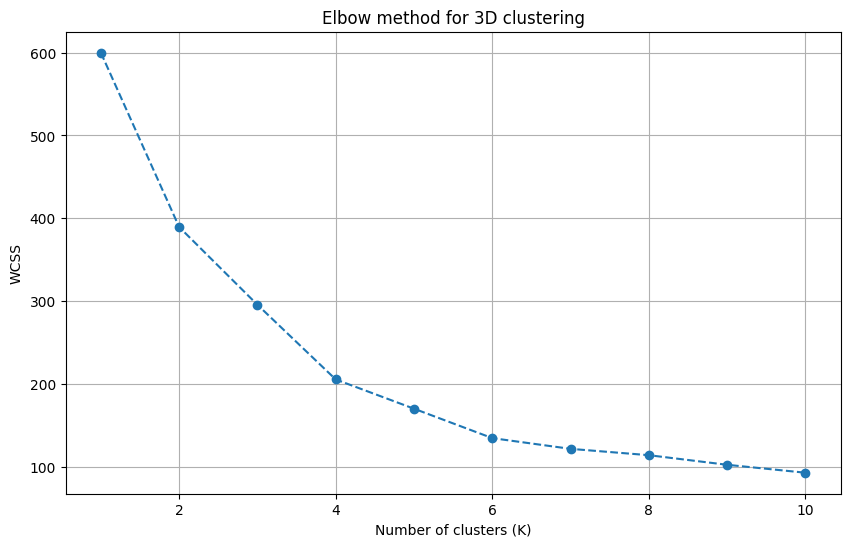

In [12]:
X_3d = df.iloc[:, [2, 3, 4]].values
X_3d_scaled=scaler.fit_transform(X_3d)

# Find optimal K for 3D
wcss_3d = []
for i in range(1, 11):
    kmeans =KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_3d_scaled)
    wcss_3d.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_3d, marker='o', linestyle='--')
plt.title('Elbow method for 3D clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

**Fit and visualize KMeans (3D)**

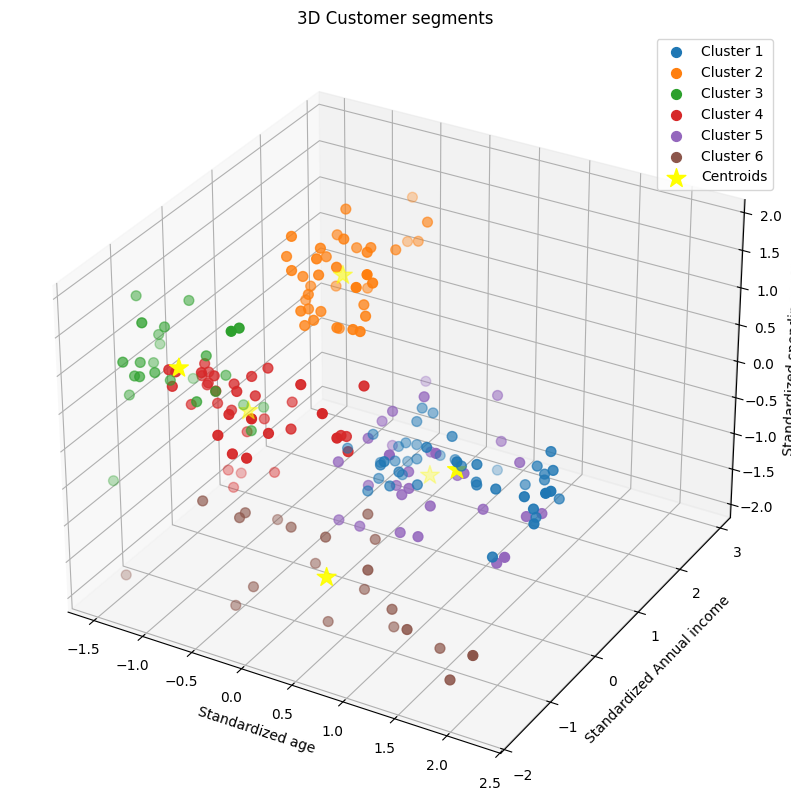

In [13]:
# Perform 3D clustering
optimal_k_3d = 6  # Based on elbow method
kmeans_3d = KMeans(n_clusters=optimal_k_3d, init='k-means++', random_state=42)
y_kmeans_3d = kmeans_3d.fit_predict(X_3d_scaled)

# Visualize 3D clusters
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(optimal_k_3d):
    ax.scatter(X_3d_scaled[y_kmeans_3d == i, 0],
               X_3d_scaled[y_kmeans_3d == i, 1],
               X_3d_scaled[y_kmeans_3d == i, 2],
               s=50, label=f'Cluster {i+1}')

ax.scatter(kmeans_3d.cluster_centers_[:, 0],
           kmeans_3d.cluster_centers_[:, 1],
           kmeans_3d.cluster_centers_[:, 2],
           s=200, c='yellow', label='Centroids', marker='*')

ax.set_title('3D Customer segments')
ax.set_xlabel('Standardized age')
ax.set_ylabel('Standardized Annual income')
ax.set_zlabel('Standardized spending score')
ax.legend()
plt.show()

**Silhouette score (3D)**

In [14]:
silhouette_avg_3d = silhouette_score(X_3d_scaled, y_kmeans_3d)
print(f"Silhouette Score for 3D clustering with K={optimal_k_3d}: {silhouette_avg_3d:.3f}")

Silhouette Score for 3D clustering with K=6: 0.431


**PCA + KMeans visualization**

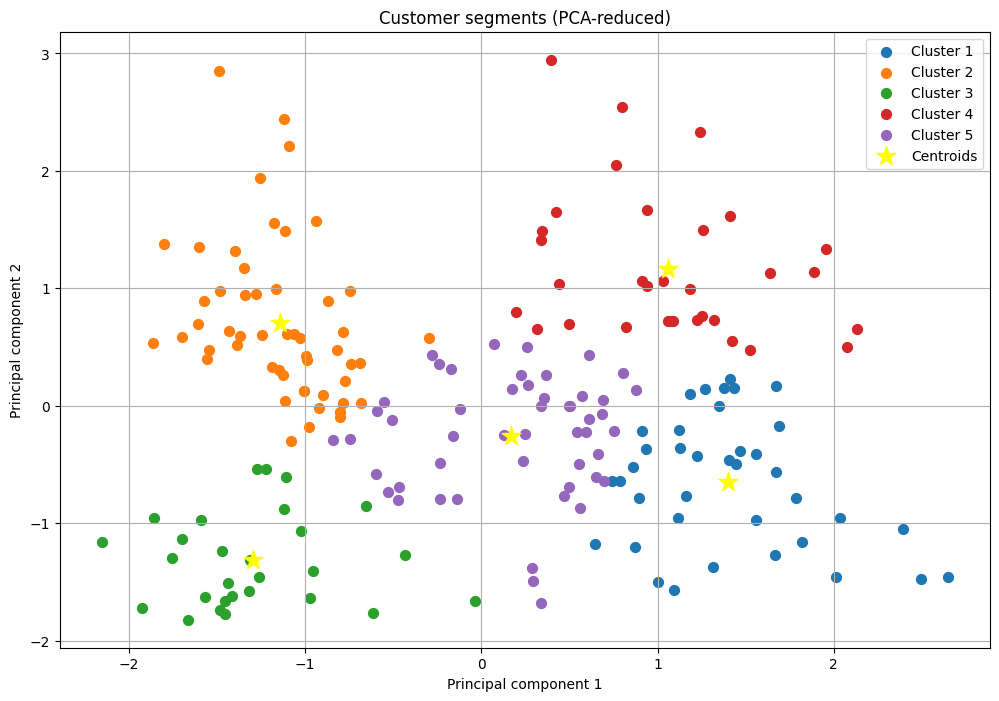

In [15]:
#PCA for 2D visualization of multi-dimensional clustering
X_all = df.iloc[:, [2, 3, 4]].values
X_all_scaled = scaler.fit_transform(X_all)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all_scaled)

# Perform K-Means on PCA-reduced data
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

# Visualize PCA clusters
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.scatter(X_pca[y_kmeans_pca ==i, 0], X_pca[y_kmeans_pca ==i, 1],
                s=50, label=f'Cluster {i+1}')

plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
            s=200, c='yellow', label='Centroids', marker='*')
plt.title('Customer segments (PCA-reduced)')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend()
plt.grid()
plt.show()